### Matplotlib 한글폰트 사용하기

#### 1. 필요한 패키지를 가져옵니다.

In [1]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#### 2. 그래프를 그리기 위해 임의의 데이터를 만들어줍니다.

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([-18, -16,  34, 103, 183, 221, 125, 187, 150,  93, 192, 178, 106,
       119, 149, 242, 264, 276, 339, 363, 382, 354, 414, 495, 504, 521,
       505, 406, 306, 214, 140, 140, 144, 184, 190, 189, 262, 327, 300,
       343, 343, 243, 285, 383, 329, 426, 367, 349, 279, 292], dtype=int32)

#### 3. 기본 폰트로 지정되었기 때문에 한글이 깨져 나옵니다.

Text(0.5, 0, '시간(분)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52628 missing from c

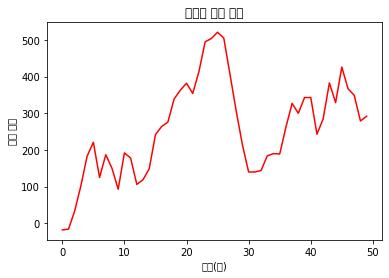

In [3]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

#### 4. 폰트를 설정해주기에 앞서 설치된 matplotlib의 버전과 위치정보를 가져옵니다. 

In [4]:
print('버전: ', mpl.__version__)
print('설치 위치: ', mpl.__file__)
print('설정 위치: ', mpl.get_configdir())
print('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.3
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\admin\.matplotlib
캐시 위치:  C:\Users\admin\.matplotlib


#### 5. matplotlib의 위치정보를 알았으니 터미널을 이용해 해당 위치로 가봅니다.

In [5]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


#### 6. 설치된 폰트를 찍어 봅니다.

In [6]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

278


In [7]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10]

['C:\\Windows\\Fonts\\CENTURY.TTF',
 'C:\\Windows\\Fonts\\verdanaz.ttf',
 'C:\\Windows\\Fonts\\MSUIGHUR.TTF',
 'C:\\Windows\\Fonts\\GOTHIC.TTF',
 'C:\\Windows\\Fonts\\corbell.ttf',
 'C:\\Windows\\Fonts\\HMFMOLD.TTF',
 'C:\\Windows\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\JUICE___.TTF']

In [8]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[:10]

278


['STIXGeneral',
 'cmr10',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'STIXSizeTwoSym']

#### 7. 나눔고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.

- 폰트를 설치했는데 원하는 폰트명을 가져오지 못할 때, 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시위치로 이동해서 캐시파일을 열어봅니다.
- 캐시파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

In [9]:
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'D2Coding' in f.name]

[('D2Coding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding.ttf'),
 ('D2Coding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding.ttf')]

#### 8. 폰트를 사용하는 방법은 3가지가 있습니다.

    1) FontProperties를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해주어야 합니다.
    2) matplotlib.rcParam[]으로 전역글꼴 설정 방법 - 그래프에 설정을 해주면 폰트가 필요한 항목에 적용됩니다.
    3) 2)번의 방법을 mpl.matplotlib_fname()으로 읽어지는 설정 파일에 직접 적어주는 방법. 단, 모든 노트북에 적용됩니다. 노트북을 열 때마다 지정해주지 않아도 돼서 편리합니다.

#### 1) FontProperties를 사용하는 방법
    - 텍스트를 지정하는 항목에 지정해 사용할 수 있습니다. 지정해 준 항목에만 해당 폰트가 적용됩니다.
    - matplotlib.pyplot
        - title()
        - xlabel()
        - ylabel()
        - legend()
        - text()
    - matplotlib.axes
        - set_title()

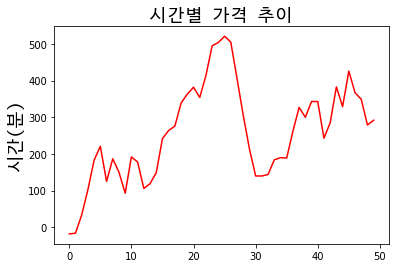

In [10]:
path = 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.ylabel('시간(분)', fontproperties=fontprop)
plt.show()

#### 2) matplotlib.rcParam[]으로 전역글꼴 설정 방법

In [11]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print(plt.rcParams['font.size'])
print('# 설정되어있는 폰트 글꼴')
print(plt.rcParams['font.family'])

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['sans-serif']


In [13]:
# serif, snas-serif, monospace
print('serif 세리프가 있는 폰트----------')
print(plt.rcParams['font.serif'])
print('sans-serif 세리프가 없는 폰트------------')
print(plt.rcParams['font.sans-serif'])
print('monospace 고정폭 글꼴-------------')
print(plt.rcParams['font.monospace'])

serif 세리프가 있는 폰트----------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트------------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴-------------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [14]:
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (14, 4)

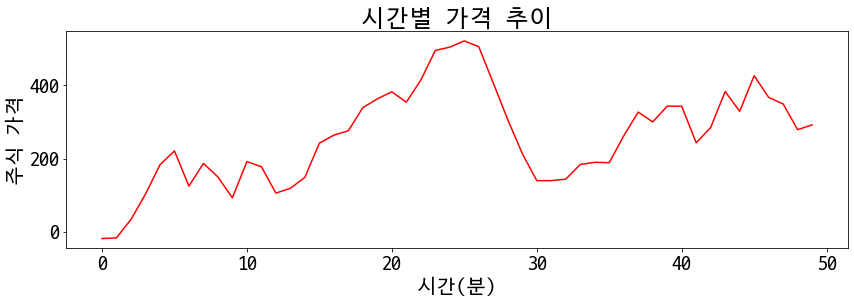

In [15]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

##### rcParam 대신 FontProperties와 plt.rc를 사용하는 방법 

D2Coding


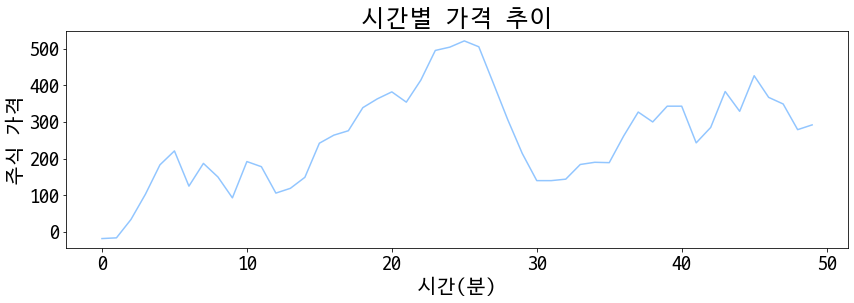

In [17]:
path = 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

#### 3) rcParams를 설정파일에 직접 적어주는 방법 - 모든 노트북에 공통적용

- font.family : D2Coding
- 이 외에 자주 사용하는 설정도 함께 해주면 편리합니다.
- 이곳에 폰트를 지정해 주면 노트북을 실행할 때 바로 로드되도록 설정할 수 있습니다.

In [18]:
print('설정파일 위치 : ', mpl.matplotlib_fname())

설정파일 위치 :  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


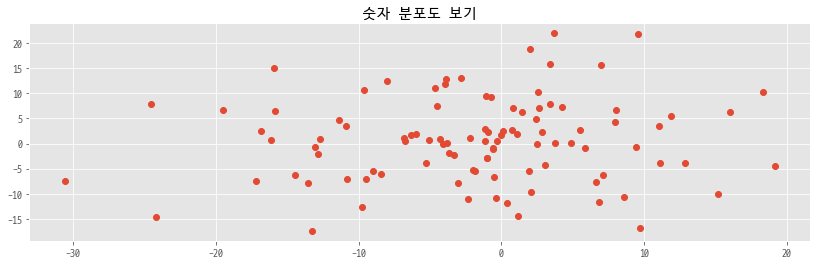

In [19]:
fig, ax = plt.subplots()
ax.plot(10 * np.random.randn(100), 10 * np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()